This notebook implements linear regression from scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [12]:
# If you wanna use one feature from california dataset
california = datasets.fetch_california_housing
print(california().data.shape)

X_train2 = california().data[:, 0]  # selecting only 1 column
y_train2 = california().target      # selecting labels
X_train2 = X_train2[0:100]      # selecting first 100 examples of first feature
y_train2 = y_train2[0:100]      # selecting first 100 examples of first feature

y_hat2 = np.zeros([len(y_train2)]) 

# If you wanna use a user defined dataset 
X = np.array([0, 2, 3, 5, 8, 9])
y_train = np.array([3, 6, 8.6, 12, 25, 42])
y_hat = np.zeros([len(y_train)])        # an array of zeros this will have the trained line or set of data

(20640, 8)


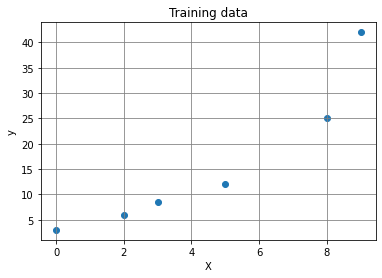

In [13]:
# Plot of training data
plt.scatter(X, y_train,  marker="o")
plt.title("Training data")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True, color= "grey")

Iterative implementation of computing cost fn

In [4]:
# Function to calculate J (w, b) i.e cost, for a given weight and bias
# This fn returns overall cost and predicted target values

def compute_cost(y_train, y_hat, w, b, X):
  m = len(y_train)
  J = 0
  for i in range(m):
    y_hat[i] = w*X[i] + b         # predicted target 
    error = y_train[i]-y_hat[i]   # diff bw true target vs predicted target
    J+= error**2                  # overall cost
  J*=(1/2*m)                      # normalized
  return J, y_hat

Vectorized implementation of computing cost fn

In [14]:
# Function to calculate cost for a given weight and bias without using a loop

def compute_cost_vectorized(y_train, y_hat, w, b, X):
  m = len(y_train)
  J = 0
  y_hat = w*X + b           # predicted target 
  error = y_train - y_hat   # diff bw true target vs predicted target
  J = np.sum(error**2)      # overall cost by summing the entire column
  J*=(1/2*m)
  
  return J, y_hat

This cell is for testing and visualization purposes of the cost fn defined above

1742.25


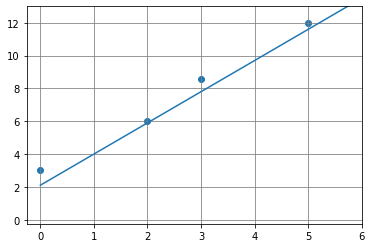

In [19]:
# example of cost function being run and plotting the predicted line for a given 
# weight and bias, here iteration = 1

w = 1.9   # weight
b = 2.1   # bias

cost, y_hat = compute_cost_vectorized(y_train, y_hat, 1.9, 2.1, X)
# y_hat is the prediction
print(cost)

plt.xlim([-0.25, 6])
plt.ylim([-0.25, 13])
plt.plot(X, y_hat)
plt.scatter(X, y_train,  marker="o")
plt.grid(True, color= "grey")

Iterative calculation of $\frac {\partial J} {\partial w} $ and 
$\frac {\partial J} {\partial b} $    or $\Delta J$ wrt to w and b

In [52]:
# function to calculate gradient of cost function wrt to w and b for further use 
# for gradiemt descent algorithm, here y_hat is taken from above compute_cost()
def compute_grad(y_train, y_hat, X):
  m = len(y_train)
  d_by_dw_dJ = 0
  d_by_db_dJ = 0

  for i in range(m):
    d_by_dw_dJ += (y_hat[i]-y_train[i])*X[i]
    d_by_db_dJ += (y_hat[i]-y_train[i])

  d_by_dw_dJ *= 1/m
  d_by_db_dJ *= 1/m
  return d_by_dw_dJ, d_by_db_dJ

d_by_dw_dJ, d_by_db_dJ = compute_grad(y_train, y_hat, X)
print(d_by_dw_dJ)
print(d_by_db_dJ)

Vectorized calculation of $\frac {\partial J} {\partial w} $ and 
$\frac {\partial J} {\partial b} $

In [54]:
def compute_grad_vectorized(y_train, y_hat, X):
  m = len(y_train)

  d_by_dw_dJ = (1/m) * np.dot((y_hat - y_train), X)   # no need for numpy sum here as dot product is a scalar 
  d_by_db_dJ = (1/m) * np.sum(y_hat-y_train)
  return d_by_dw_dJ, d_by_db_dJ

d_by_dw_dJ, d_by_db_dJ = compute_grad_vectorized(y_train, y_hat, X)
print(d_by_dw_dJ)
print(d_by_db_dJ)

Gradient Descent Algorithm

In [86]:
# Gradient descent algorithm, the three lists keep track of cost, weigh and bias
# observe how cost is decreasing if it isnt then tune lr (learning rate)
def grad_descent(X_train, y_train, y_hat, iteration):
  J_itr = []
  w_itr = []
  b_itr = []
  w, b = 0, 0
  lr = 0.001
  for i in range(iteration):
    cost, y_hat = compute_cost_vectorized(y_train, y_hat, w, b, X_train)      # calling cost function  
    d_by_dw_dJ, d_by_db_dJ = compute_grad_vectorized(y_train, y_hat, X_train) # calling grad function
    w = w - lr*(d_by_dw_dJ)
    b = b - lr*(d_by_db_dJ)

    J_itr.append(cost)
    w_itr.append(w)
    b_itr.append(b)

  # print(J_itr, "\n", w_itr, "\n", b_itr)
  return itr, J_itr, y_hat

iter = int(input("Enter the no. of iteration for which you want to run gradient descent: "))
itr, J_list, y_hat = grad_descent(X_train2, y_train2, y_hat2, iter)   # choose which data to feed 

Enter the no. of iteration for which you want to run gradient descent: 20000


In [85]:
print("Final cost is: ", J_list[-1])

Final cost is:  1954.6396130657947


Text(0, 0.5, 'Cost')

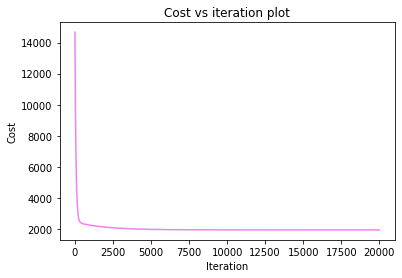

In [87]:
#Plotting Cost vs # of iterations to check if gradient descent is converging
plt.plot(np.arange(0, iter), J_list, color = "violet")
plt.title("Cost vs iteration plot")
plt.xlabel("Iteration")
plt.ylabel("Cost")

Text(0, 0.5, 'Target data')

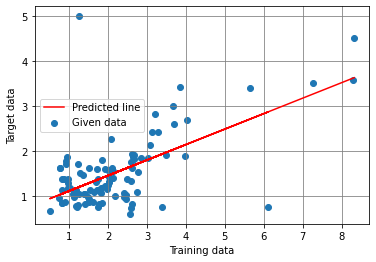

In [88]:
# Plotting the predicted linear function (line i.e y_hat wrt x)

plt.plot(X_train2, y_hat, color = "red", label = "Predicted line")            
plt.scatter(X_train2, y_train2,  marker="o", label = "Given data")

plt.grid(True, color= "grey")
plt.legend()
plt.xlabel("Training data")
plt.ylabel("Target data")